In [13]:
from src import MicroNet as MN
from src import Frequentist as F

from sklearn.metrics import roc_auc_score, mean_absolute_error
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Creates model
bayesNet = MN.MicroNet()
bayesNet.build()
bayesNet.save_model('./models/MicroMacroNet.pickle')
# Reads it, if already built
bayesNet = MN.MicroNet()
bayesNet.model = MN.MicroNet().build_from_pickle('./models/MicroMacroNet.pickle')

In [3]:
yPred, yTrue = bayesNet.compute_val_score()
yTrueSparse = np.zeros((yTrue.size,7))
for i, c in enumerate(list(yTrue)):
    yTrueSparse[i][c] = 1.0

0it [00:00, ?it/s]C:\Users\Lucas\miniconda3\envs\polienv\lib\site-packages\pgmpy\factors\discrete\DiscreteFactor.py:775: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi1.values
1it [00:02,  2.08s/it]C:\Users\Lucas\miniconda3\envs\polienv\lib\site-packages\pgmpy\factors\discrete\DiscreteFactor.py:775: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi1.values
3it [00:04,  1.30s/it]C:\Users\Lucas\miniconda3\envs\polienv\lib\site-packages\pgmpy\factors\discrete\DiscreteFactor.py:775: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi1.values
5it [00:06,  1.14s/it]C:\Users\Lucas\miniconda3\envs\polienv\lib\site-packages\pgmpy\factors\discrete\DiscreteFactor.py:775: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi1.values
7it [00:08,  1.08s/it]C:\Users\Lucas\miniconda3\envs\polienv\lib\site-packages\pgmpy\factors\discrete\DiscreteFactor

In [4]:
roc_auc_score(yTrue,yPred,multi_class='ovr',average='weighted')

0.9291877104377103

In [5]:
mean_absolute_error(yTrueSparse,yPred)

0.0965211324293385

In [6]:
transitionMatrix = F.TransitionMatrix()
yPredMatrix, yTrueMatrix = transitionMatrix.compute_val_score()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.55it/s]
24it [00:00, 1850.94it/s]


In [7]:
roc_auc_score(yTrue,yPredMatrix,multi_class='ovr',average='weighted')

0.9035669191919192

In [8]:
mean_absolute_error(yTrueSparse,yPredMatrix)

0.14384807762503898

In [9]:
transitionMatrix.matrix.to_csv('./data/transition_matrix.csv')

In [10]:
bayesNet.create_bayesian_matrix().to_csv('./data/bayesian_matrix.csv')

C:\Users\Lucas\miniconda3\envs\polienv\lib\site-packages\pgmpy\factors\discrete\DiscreteFactor.py:775: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi1.values


In [11]:
bayes_matrix = pd.read_csv('./data/bayesian_matrix.csv', index_col=['Unnamed: 0'])

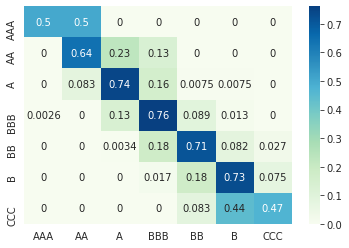

In [14]:
with sns.axes_style("darkgrid"):
    sns_plot = sns.heatmap(((transitionMatrix.matrix)), annot=True, cmap="GnBu")
    fig = sns_plot.get_figure()
    fig.savefig("./images/transitionMatrix.png", dpi=600)    

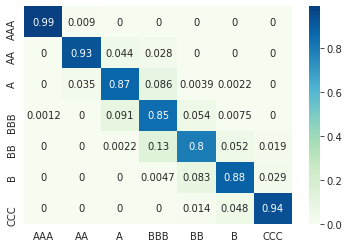

In [15]:
with sns.axes_style("darkgrid"):
    sns_plot = sns.heatmap((bayes_matrix), annot=True, cmap="GnBu")
    fig = sns_plot.get_figure()
    fig.savefig("./images/bayes_matrix.png", dpi=600)

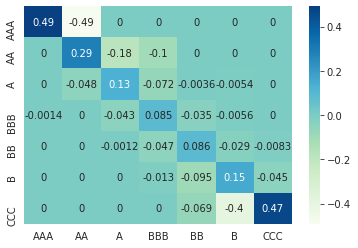

In [16]:
with sns.axes_style("darkgrid"):
    sns_plot = sns.heatmap((bayes_matrix - transitionMatrix.matrix), annot=True, cmap="GnBu")
    fig = sns_plot.get_figure()
    fig.savefig("./images/diffmatrix.png", dpi=600)    